In [38]:
import cv2
import os
import numpy as np
import matplotlib.pyplot as plt

import warnings
warnings.simplefilter('ignore')

from skimage.metrics import peak_signal_noise_ratio
from scipy import ndimage as nd
from skimage import io
from skimage import img_as_float
from skimage.restoration import denoise_tv_chambolle,denoise_wavelet,denoise_nl_means,estimate_sigma

In [39]:
normal_img = cv2.imread("/content/drive/MyDrive/Possion/Normal/Normal-1.png")
normal_img = cv2.cvtColor(normal_img, cv2.COLOR_BGR2GRAY)
noisy_img = cv2.imread("/content/drive/MyDrive/Possion/Poisson/Pois_1.png")
noisy_img = cv2.cvtColor(noisy_img, cv2.COLOR_BGR2GRAY)

print(normal_img.shape)
print(noisy_img.shape)

(512, 512)
(512, 512)


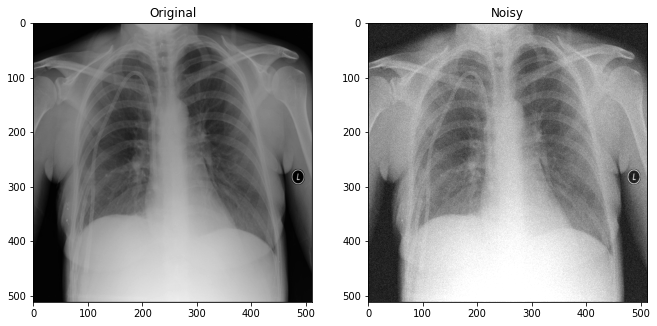

In [40]:
plt.figure(figsize=(11,6))
plt.subplot(121)
plt.imshow(normal_img,cmap='gray'),plt.title('Original')
plt.subplot(122)
plt.imshow(noisy_img,cmap='gray'),plt.title('Noisy')
plt.show()

# BM3D

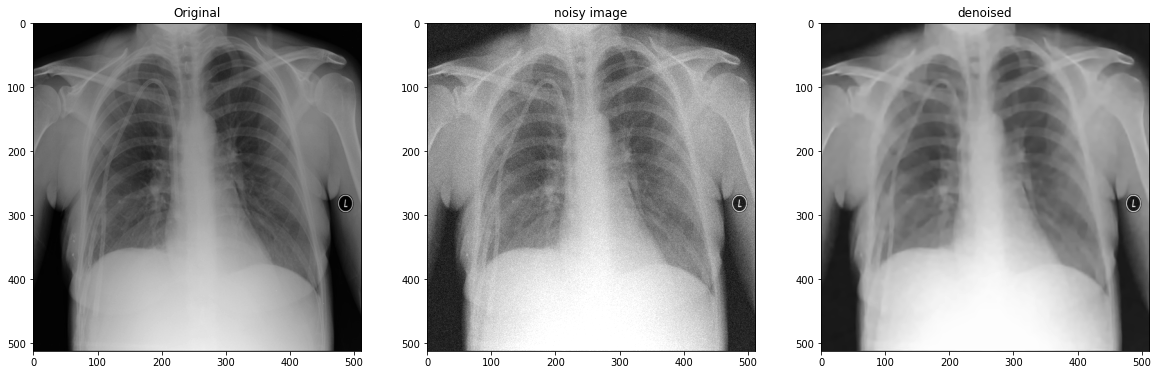

In [41]:
import bm3d
denoised_image_bm3d = bm3d.bm3d(noisy_img, sigma_psd=15, stage_arg=bm3d.BM3DStages.ALL_STAGES)

plt.figure(figsize=(20,12))
plt.subplot(131), plt.imshow(normal_img, cmap="gray"),plt.title('Original')
plt.subplot(132), plt.imshow(noisy_img,cmap="gray"),plt.title('noisy image')
plt.subplot(133), plt.imshow(denoised_image_bm3d,cmap="gray"),plt.title('denoised')
plt.show()

In [42]:
noise_psnr = peak_signal_noise_ratio(normal_img, noisy_img)
cleaned_psnr = peak_signal_noise_ratio(normal_img, denoised_image_bm3d)
print("PSNR of input noisy image = ", noise_psnr)
print("PSNR of cleaned image = ", cleaned_psnr)

PSNR of input noisy image =  12.566632254721641
PSNR of cleaned image =  12.629406473593557


# Bilateral Filter

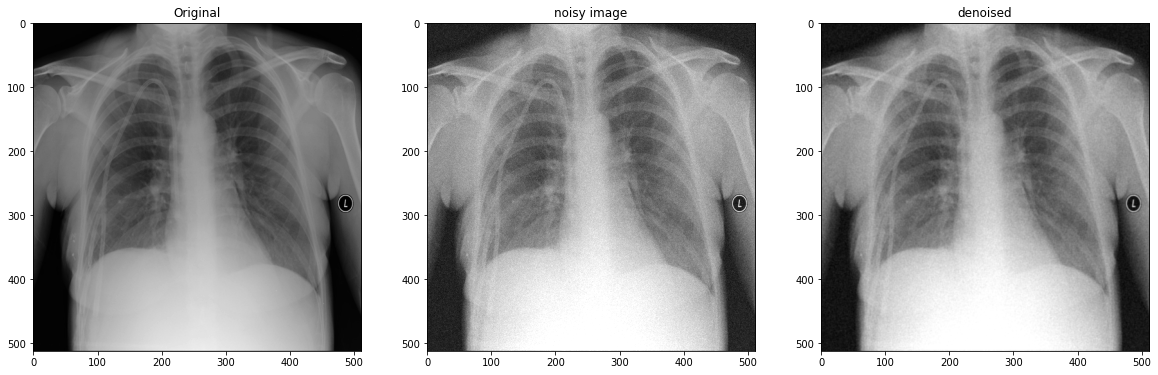

In [43]:
bilateral_blur = cv2.bilateralFilter(noisy_img,1,512,512)

plt.figure(figsize=(20,12))
plt.subplot(131), plt.imshow(normal_img, cmap="gray"),plt.title('Original')
plt.subplot(132), plt.imshow(noisy_img,cmap="gray"),plt.title('noisy image')
plt.subplot(133), plt.imshow(bilateral_blur,cmap="gray"),plt.title('denoised')
plt.show()

In [44]:
noise_psnr = peak_signal_noise_ratio(normal_img, noisy_img)
cleaned_psnr = peak_signal_noise_ratio(normal_img, bilateral_blur)
print("PSNR of input noisy image = ", noise_psnr)
print("PSNR of cleaned image = ", cleaned_psnr)

PSNR of input noisy image =  12.566632254721641
PSNR of cleaned image =  12.611353679874291


# Total Variation

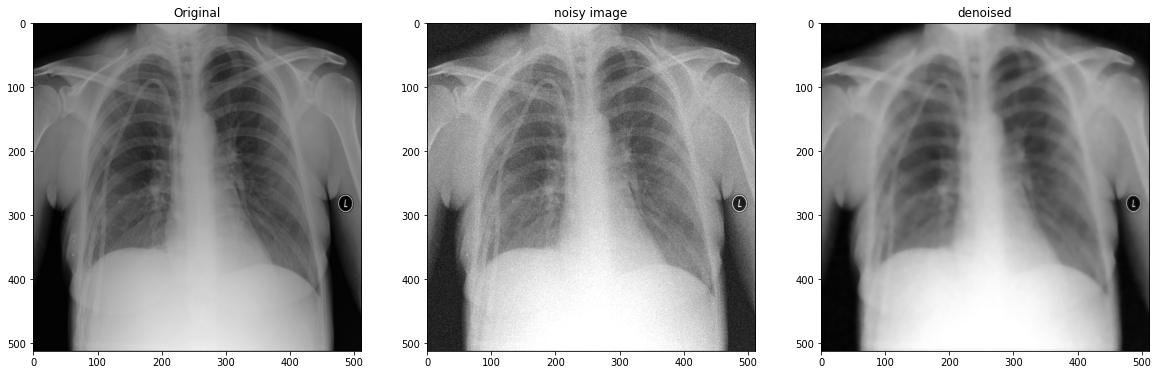

In [45]:
denoise_img_chambolle = denoise_tv_chambolle(noisy_img,weight=0.1,multichannel=False)

plt.figure(figsize=(20,12))
plt.subplot(131), plt.imshow(normal_img, cmap="gray"),plt.title('Original')
plt.subplot(132), plt.imshow(noisy_img,cmap="gray"),plt.title('noisy image')
plt.subplot(133), plt.imshow(denoise_img_chambolle,cmap="gray"),plt.title('denoised')
plt.show()

In [46]:
noise_psnr = peak_signal_noise_ratio(normal_img, noisy_img)
cleaned_psnr = peak_signal_noise_ratio(normal_img, denoise_img_chambolle)
print("PSNR of input noisy image = ", noise_psnr)
print("PSNR of cleaned image = ", cleaned_psnr)

PSNR of input noisy image =  12.566632254721641
PSNR of cleaned image =  6.924793283835941


# Wavelet Transform

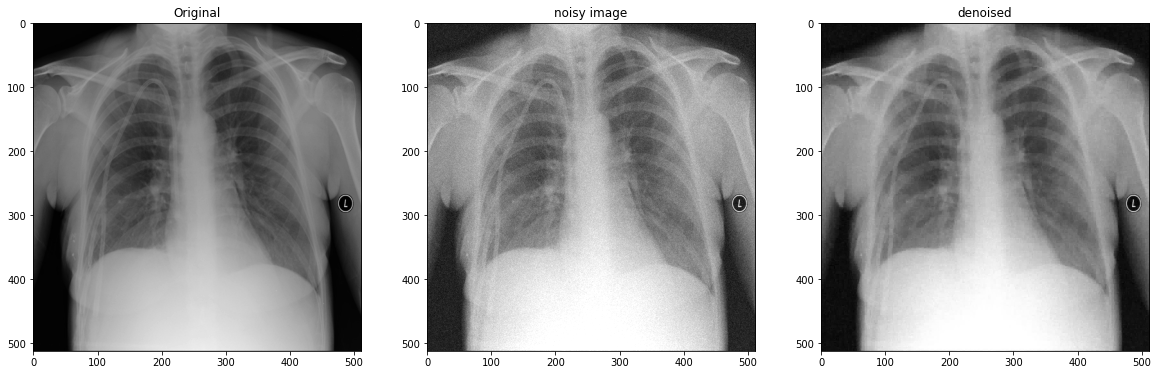

In [47]:
denoise_img_wavelet = denoise_wavelet(noisy_img,multichannel=False,method='BayesShrink',
                                      mode='soft',rescale_sigma=True)

plt.figure(figsize=(20,12))
plt.subplot(131), plt.imshow(normal_img, cmap="gray"),plt.title('Original')
plt.subplot(132), plt.imshow(noisy_img,cmap="gray"),plt.title('noisy image')
plt.subplot(133), plt.imshow(denoise_img_wavelet,cmap="gray"),plt.title('denoised')
plt.show()

In [48]:
noise_psnr = peak_signal_noise_ratio(normal_img, noisy_img)
cleaned_psnr = peak_signal_noise_ratio(normal_img, denoise_img_wavelet)
print("PSNR of input noisy image = ", noise_psnr)
print("PSNR of cleaned image = ", cleaned_psnr)

PSNR of input noisy image =  12.566632254721641
PSNR of cleaned image =  6.924835974114884


# N1 Means

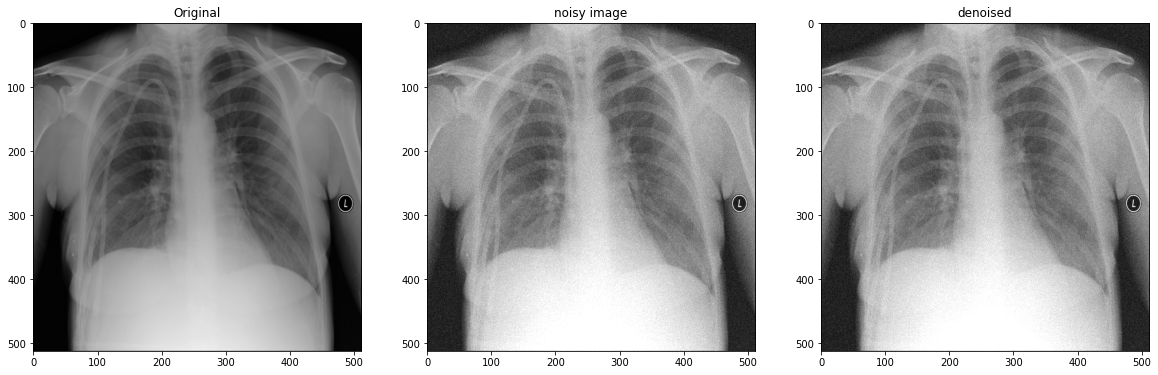

In [49]:
sigma_est = np.mean(estimate_sigma(noisy_img,multichannel=False))
img_nl = denoise_nl_means(noisy_img,sigma_est,h=2.15,patch_distance=5)

plt.figure(figsize=(20,12))
plt.subplot(131), plt.imshow(normal_img, cmap="gray"),plt.title('Original')
plt.subplot(132), plt.imshow(noisy_img,cmap="gray"),plt.title('noisy image')
plt.subplot(133), plt.imshow(img_nl,cmap="gray"),plt.title('denoised')
plt.show()

In [50]:
noise_psnr = peak_signal_noise_ratio(normal_img, noisy_img)
cleaned_psnr = peak_signal_noise_ratio(normal_img, img_nl)
print("PSNR of input noisy image = ", noise_psnr)
print("PSNR of cleaned image = ", cleaned_psnr)

PSNR of input noisy image =  12.566632254721641
PSNR of cleaned image =  12.566470539255565


# Median Filter

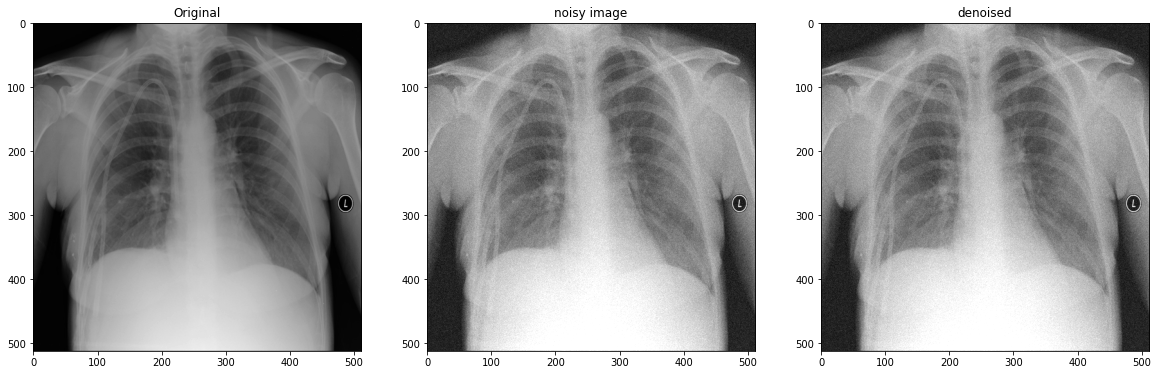

In [51]:
median_image = nd.median_filter(noisy_img, size = 1)

plt.figure(figsize=(20,12))
plt.subplot(131), plt.imshow(normal_img, cmap="gray"),plt.title('Original')
plt.subplot(132), plt.imshow(noisy_img,cmap="gray"),plt.title('noisy image')
plt.subplot(133), plt.imshow(median_image,cmap="gray"),plt.title('denoised')
plt.show()

In [52]:
noise_psnr = peak_signal_noise_ratio(normal_img, noisy_img)
cleaned_psnr = peak_signal_noise_ratio(normal_img, median_image)
print("PSNR of input noisy image = ", noise_psnr)
print("PSNR of cleaned image = ", cleaned_psnr)

PSNR of input noisy image =  12.566632254721641
PSNR of cleaned image =  12.566632254721641
